<a href="https://colab.research.google.com/github/joydeep03564/Machine_Learning-/blob/master/Conference_paper_IDS_in_Healthcare_ICU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Acknowledgement:

Citation: Hussain, F.; Abbas, S.G.; Shah, G.A.; Pires, I.M.; Fayyaz, U.U.; Shahzad, F.; Garcia, N.M.; Zdravevski, E. A Framework for Malicious Traffic Detection in IoT Healthcare Environment. Sensors 2021, 21, 3025. https://doi.org/ 10.3390/s21093025 Academic Editors: Hans Hallez, Bart Vanrumste, Wei Chen and Roozbeh Jafari.

My work below is inspired from the above mentioned paper.

**# Context:**
Internet of things has emerged as a key area of research in both academic and industrial  communinity. IOT in a nutshell is a collection of objects which are connected to the internet and has the ability to communicate with each other.
In IOT, we are deallng with the connectivity of objects which has contraints on power,compute and secuirity.
Smart systems are made by combining the power of these embedded objects with the power of analytics in edge or cloud. our smart cities,smart watch etc.
are nothing but bunch of connected devices with analytical capabilities.

With the increase of the IOT devices, security is one of the most activate area  of research. In recent  times the malacious attacks on the IOT newtwork has become very popular. As these IOT devices operates in constrainted power,bandwidth, memory environment, traditional IT network security or Intrution Detection systems(IDS) can't be implemented for IOT networks.
Hence there is a need for IDS

In this project, we are going to train a machine learning/deep learning model which can detect a malacous attack on the IOT network.
    
Healthcare sytems are very sensetive area and compromising the secuirity of those system can take life. For example changing the volume and injection rate of the infusion pump of ICU patient can lead to catastropic ending.  

# Constraint:

We understand that there is need for a IDS systems or frame work for IOT Networks. In IOT also we can clasify the securty soluon into two kinds 
1. Network based Intrusion detection systems
2. Host or end point based intrusion detection system.

The major constraints are:
1. The newtorks potocals are different. Most common protocals are Message Queuing Telemetry Transport (MQTT) and COAP at application layers
2. Lack of real time and simulated dataset
3. Simulating malacious attack situation with MQTT and COAP protocals 

**Project Frame Work:**

The authors of the papers has simulated the complete ICU IOT network using IOT Flock. The steps are the following steps are being performed:

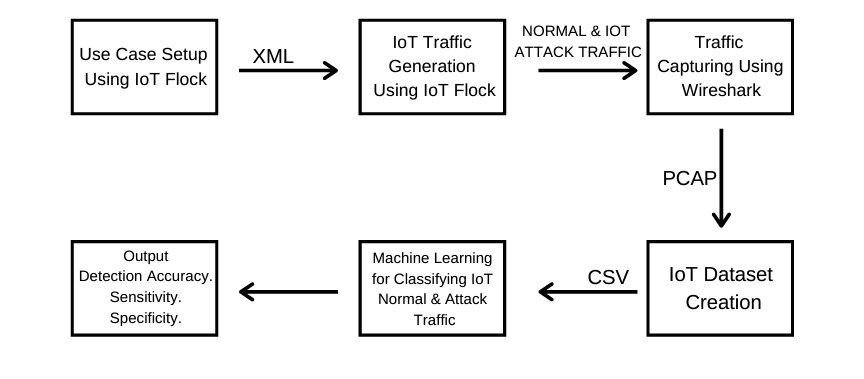

The authors use the mentioned below set up for configuring the ICU environment and collected the data for both normal and attack traffic data.

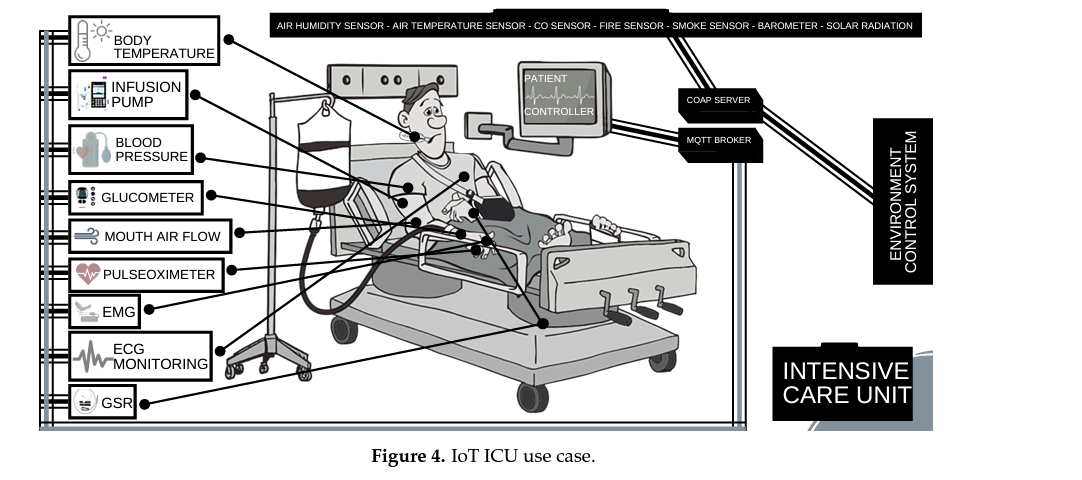

There two kinds of sensors used in the set up-patient monitoring and environment mornitoring. There are two charecteristics of the devices are used. The first one is data profile and then second one is the time: data profile is collected after consulting the datasets of each sensors.
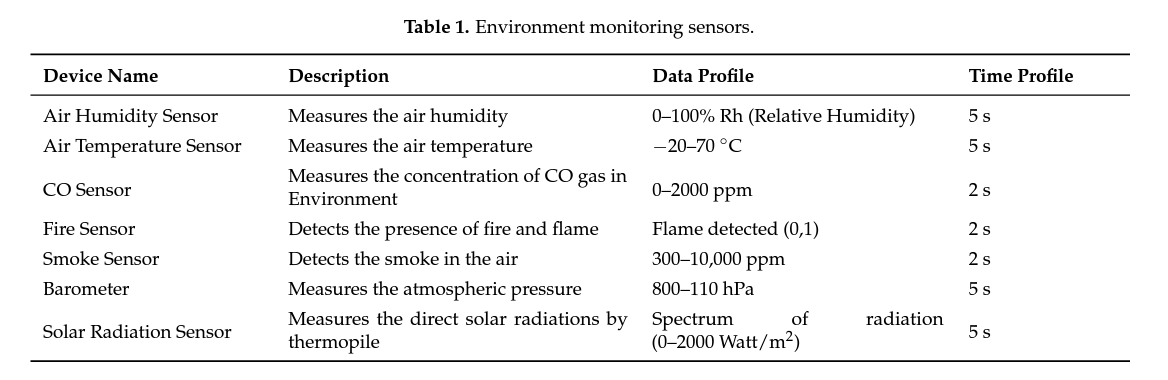



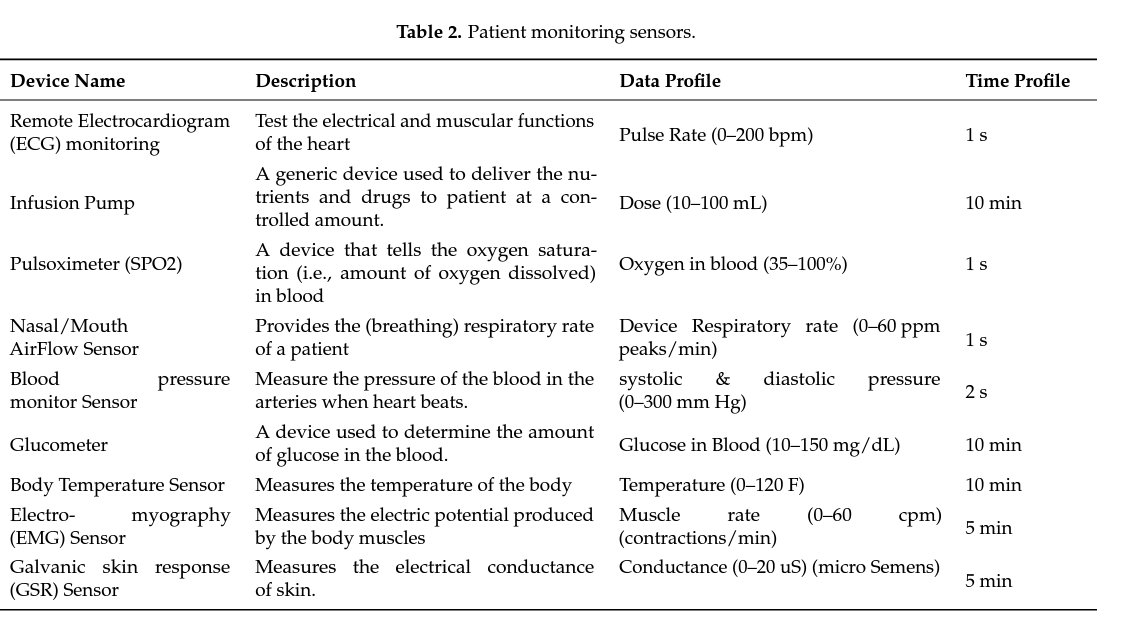

# Data Preperation and Modelling:

These phase will be further devided into 3 categories 

1. Data Collection 
2. Data exploration 
3. Modeling 
4. Kalman architecture and description

### Data collection:

In [1]:
# Configuring google colab:

from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# importing the necessary libraries to load and perform EDA

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
dataset_attack = pd.read_csv('/content/drive/MyDrive/ML_Projects_IOT/Detections of malacious attacks in healthcare/ICUDatasetProcessed/Attack.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (26,28,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
dataset_attack.head()

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,tcp.ack,tcp.connection.fin,tcp.connection.rst,tcp.connection.sack,tcp.connection.syn,tcp.flags.ack,tcp.flags.fin,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.urg,tcp.hdr_len,tcp.payload,tcp.pdu.size,tcp.window_size_value,tcp.checksum,mqtt.clientid,mqtt.clientid_len,mqtt.conack.flags,mqtt.conack.val,mqtt.conflag.passwd,mqtt.conflag.qos,mqtt.conflag.reserved,mqtt.conflag.retain,mqtt.conflag.willflag,mqtt.conflags,mqtt.dupflag,mqtt.hdrflags,mqtt.kalive,mqtt.len,mqtt.msg,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
0,0.000000,0.000000,74,10.16.120.44,10.16.120.72,56808,1883,0x00000002,0.000000,0,0,0.0,0.0,0.0,1.0,0,0,0,0,1,0,40,0,0.0,29200,0x00009a5d,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
1,0.000052,0.000052,74,10.16.120.72,10.16.120.44,1883,56808,0x00000012,0.000052,0,1,0.0,0.0,1.0,0.0,1,0,0,0,1,0,40,0,0.0,28960,0x00009941,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
2,0.000008,0.000060,74,10.16.120.44,10.16.120.72,56810,1883,0x00000002,0.000000,0,0,0.0,0.0,0.0,1.0,0,0,0,0,1,0,40,0,0.0,29200,0x0000bb2e,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
3,0.000012,0.000072,74,10.16.120.72,10.16.120.44,1883,56810,0x00000012,0.000012,0,1,0.0,0.0,1.0,0.0,1,0,0,0,1,0,40,0,0.0,28960,0x00000e6e,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
4,0.000003,0.000075,74,10.16.120.44,10.16.120.72,56812,1883,0x00000002,0.000000,0,0,0.0,0.0,0.0,1.0,0,0,0,0,1,0,40,0,0.0,29200,0x0000f752,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1


In [5]:
dataset_environmentMonitor = pd.read_csv("/content/drive/MyDrive/ML_Projects_IOT/Detections of malacious attacks in healthcare/ICUDatasetProcessed/environmentMonitoring.csv")

In [6]:
dataset_patientMonitor = pd.read_csv("/content/drive/MyDrive/ML_Projects_IOT/Detections of malacious attacks in healthcare/ICUDatasetProcessed/patientMonitoring.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (26,28,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
dataset_patientMonitor.head()

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,tcp.ack,tcp.connection.fin,tcp.connection.rst,tcp.connection.sack,tcp.connection.syn,tcp.flags.ack,tcp.flags.fin,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.urg,tcp.hdr_len,tcp.payload,tcp.pdu.size,tcp.window_size_value,tcp.checksum,mqtt.clientid,mqtt.clientid_len,mqtt.conack.flags,mqtt.conack.val,mqtt.conflag.passwd,mqtt.conflag.qos,mqtt.conflag.reserved,mqtt.conflag.retain,mqtt.conflag.willflag,mqtt.conflags,mqtt.dupflag,mqtt.hdrflags,mqtt.kalive,mqtt.len,mqtt.msg,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
0,0.000000,0.000000,105,10.5.126.141,10.5.126.56,35161,1883,0x00000018,0.0,37,1,0.0,0.0,0.0,0.0,1,0,1,0,0,0,32,10:23:00:04:4d:51:54:54:04:02:00:3c:00:17:33:3...,37,512,0x0000111b,393b1640f35644d1a3ea2fe,23.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0x00000002,0.0,0x00000010,60.0,35,0.0,1,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0
1,0.000249,0.000249,105,10.5.126.143,10.5.126.56,34237,1883,0x00000018,0.0,37,1,0.0,0.0,0.0,0.0,1,0,1,0,0,0,32,10:23:00:04:4d:51:54:54:04:02:00:3c:00:17:33:3...,37,512,0x0000111d,3790fc6f442e451d954db8a,23.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0x00000002,0.0,0x00000010,60.0,35,0.0,1,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0
2,0.000037,0.000286,105,10.5.126.145,10.5.126.56,46623,1883,0x00000018,0.0,37,1,0.0,0.0,0.0,0.0,1,0,1,0,0,0,32,10:23:00:04:4d:51:54:54:04:02:00:3c:00:17:64:3...,37,512,0x0000111f,d474a23d08944fb9816de73,23.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0x00000002,0.0,0x00000010,60.0,35,0.0,1,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0
3,0.000034,0.000320,105,10.5.126.147,10.5.126.56,45663,1883,0x00000018,0.0,37,1,0.0,0.0,0.0,0.0,1,0,1,0,0,0,32,10:23:00:04:4d:51:54:54:04:02:00:3c:00:17:63:3...,37,512,0x00001121,c1770dda4c9f41fa8ace8e7,23.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0x00000002,0.0,0x00000010,60.0,35,0.0,1,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0
4,0.000017,0.000337,105,10.5.126.141,10.5.126.56,38901,1883,0x00000018,0.0,37,1,0.0,0.0,0.0,0.0,1,0,1,0,0,0,32,10:23:00:04:4d:51:54:54:04:02:00:3c:00:17:32:3...,37,512,0x0000111b,240c9e235467488f952ad44,23.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0x00000002,0.0,0x00000010,60.0,35,0.0,1,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0


In [8]:
columns_envirnmentMonitor= dataset_environmentMonitor.columns
columns_patientMonitor = dataset_patientMonitor.columns
columns_attack = dataset_attack.columns

### Checking the features of each dataframe:
The first thing we have to do it to identify that features in all the 3 CSV are same or not.
As we are going to merge this 3 CSV files into one CSV file to create our final dataset for malacious attack classification system, we need to make sure that all the dataframes has the same feature name and all sensors data are captured in the same sequence.

In [9]:
# Checking the environmentMoitors with Columns_attack
columns_envirnmentMonitor==columns_attack

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
columns_patientMonitor ==columns_attack

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
columns_envirnmentMonitor==columns_patientMonitor

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

Observation: All 3 csv files has the same columns i.e same features and labals are captured in all the 3 csv 

### exploratory data analysis

In [ ]:
# printing the features of attack.csv

columns_attack

Index(['frame.time_delta', 'frame.time_relative', 'frame.len', 'ip.src',
       'ip.dst', 'tcp.srcport', 'tcp.dstport', 'tcp.flags', 'tcp.time_delta',
       'tcp.len', 'tcp.ack', 'tcp.connection.fin', 'tcp.connection.rst',
       'tcp.connection.sack', 'tcp.connection.syn', 'tcp.flags.ack',
       'tcp.flags.fin', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.syn',
       'tcp.flags.urg', 'tcp.hdr_len', 'tcp.payload', 'tcp.pdu.size',
       'tcp.window_size_value', 'tcp.checksum', 'mqtt.clientid',
       'mqtt.clientid_len', 'mqtt.conack.flags', 'mqtt.conack.val',
       'mqtt.conflag.passwd', 'mqtt.conflag.qos', 'mqtt.conflag.reserved',
       'mqtt.conflag.retain', 'mqtt.conflag.willflag', 'mqtt.conflags',
       'mqtt.dupflag', 'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg',
       'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain', 'mqtt.topic',
       'mqtt.topic_len', 'mqtt.ver', 'mqtt.willmsg_len', 'ip.proto', 'ip.ttl',
       'class', 'label'],
      dtype='object')

In [ ]:
dataset_attack.shape

(80126, 52)

We have 80126 compromised datapoints and 52 features. In the research papers the authors used the following features:
[’frame.time_delta’, ’tcp.time_delta’, ’tcp.flags.ack’, ’tcp.flags.push’, ’tcp.flags.reset’, ’mqtt.hdrflags’, ’mqtt.msgtype’, ’mqtt.qos’, ’mqtt.retain’, ’mqtt.ver’].

In [9]:
final_data_attack= dataset_attack.filter(items=['frame.time_delta','tcp.time_delta','tcp.flags.ack','tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain','mqtt.ver','label'])

In [10]:
final_data_attack.head()

,frame.time_delta,tcp.time_delta,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,mqtt.hdrflags,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.ver,label
0,0.000000,0.000000,0,0,0,0,0.0,0.0,0.0,0.0,1
1,0.000052,0.000052,1,0,0,0,0.0,0.0,0.0,0.0,1
2,0.000008,0.000000,0,0,0,0,0.0,0.0,0.0,0.0,1
3,0.000012,0.000012,1,0,0,0,0.0,0.0,0.0,0.0,1
4,0.000003,0.000000,0,0,0,0,0.0,0.0,0.0,0.0,1


In [ ]:
# Checking the shapes of the dataset
final_data_attack.columns

Index(['frame.time_delta', 'tcp.time_delta', 'tcp.flags.ack', 'tcp.flags.push',
       'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos',
       'mqtt.retain', 'mqtt.ver', 'label'],
      dtype='object')

In [ ]:
final_data_attack.shape

(80126, 11)

In [ ]:
final_data_attack['frame.time_delta'].mean()

0.005482580660459406

### Checking the ratios of attacks dataset:

In [ ]:
# 0 represents missing values hence finding values for each of the features
# Checking and ploting the graphs for categorical features.

final_data_attack['tcp.flags.ack'].value_counts()

1    76593
0     3533
Name: tcp.flags.ack, dtype: int64

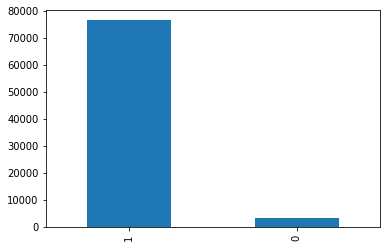

In [ ]:
# Missing values of Tcp.flag.ack
final_data_attack['tcp.flags.ack'].value_counts().plot.bar()

In [ ]:
final_data_attack['tcp.flags.push'].value_counts()

1    40382
0    39744
Name: tcp.flags.push, dtype: int64

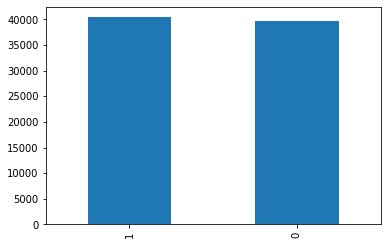

In [ ]:
final_data_attack['tcp.flags.push'].value_counts().plot.bar()

In [ ]:
final_data_attack['tcp.flags.reset'].value_counts()

0    78493
1     1633
Name: tcp.flags.reset, dtype: int64

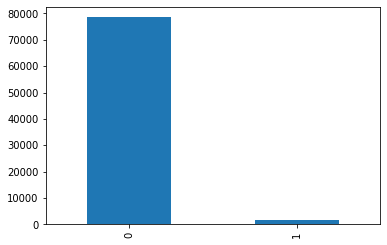

In [ ]:
final_data_attack['tcp.flags.reset'].value_counts().plot.bar()

The missing values are replaced by zero in the original paper by the authors. We are not going to change that.

### Creating the dataset for environment sensors with final 10 features

In [ ]:
final_dataset_environmentMonitor = dataset_environmentMonitor.filter(items=['frame.time_delta','tcp.time_delta','tcp.flags.ack','tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain','mqtt.ver','label'])

In [ ]:
final_dataset_environmentMonitor.shape

(31758, 11)

In [ ]:
final_dataset_environmentMonitor['tcp.flags.ack'].value_counts()

1    31758
Name: tcp.flags.ack, dtype: int64

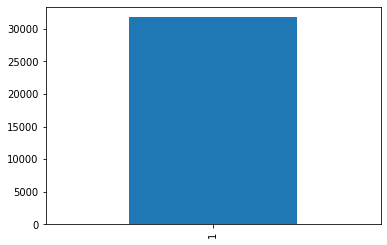

In [ ]:

final_dataset_environmentMonitor['tcp.flags.ack'].value_counts().plot.bar()

There is no zero values in the tcp.flags.ack

In [ ]:
final_dataset_patientMonitor = dataset_patientMonitor.filter(items=['frame.time_delta','tcp.time_delta','tcp.flags.ack','tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain','mqtt.ver','label'])


In [ ]:
final_dataset_patientMonitor.shape


(76810, 11)

Now we have 3 csv files with 10 features and one class label

###Prepartng the final dataset including PatientMonitors, Attackdata,EnvironmentsMonitors data

In [ ]:
final_data_set = pd.concat([final_data_attack,final_dataset_environmentMonitor,final_dataset_patientMonitor])

In [ ]:
final_data_set.shape

(188694, 11)

# Exploratory data anaysis using the complete dataset

In [ ]:
# Visualising the features and label
final_data_set.head()

,frame.time_delta,tcp.time_delta,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,mqtt.hdrflags,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.ver,label
0,0.000000,0.000000,0,0,0,0,0.0,0.0,0.0,0.0,1
1,0.000052,0.000052,1,0,0,0,0.0,0.0,0.0,0.0,1
2,0.000008,0.000000,0,0,0,0,0.0,0.0,0.0,0.0,1
3,0.000012,0.000012,1,0,0,0,0.0,0.0,0.0,0.0,1
4,0.000003,0.000000,0,0,0,0,0.0,0.0,0.0,0.0,1


In [ ]:
final_data_set['label'].value_counts()

0    108568
1     80126
Name: label, dtype: int64

The class distribution are not imbalanced in the compiled dataset 

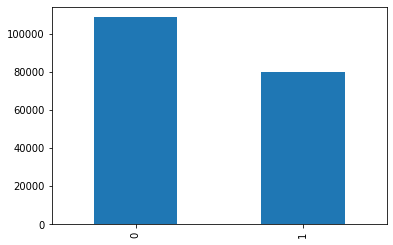

In [ ]:
final_data_set['label'].value_counts().plot.bar()

Zero label indicates normal network and 1 means malacious  

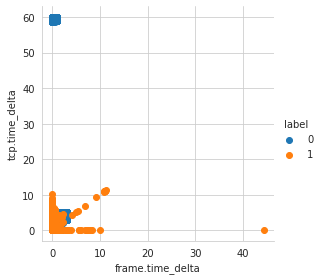

In [ ]:
# Ploting few scatter plots for finding the relatioship between normal network and compromised network 
sns.set_style('whitegrid');
sns.FacetGrid(final_data_set,hue="label",height=4)\
.map(plt.scatter,"frame.time_delta","tcp.time_delta")\
.add_legend();

plt.show()

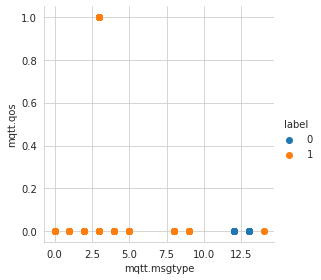

In [ ]:
sns.set_style('whitegrid');
sns.FacetGrid(final_data_set,hue="label",height=4)\
.map(plt.scatter,"mqtt.msgtype","mqtt.qos")\
.add_legend();

mqtt  msgtype for most of the shows some value 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


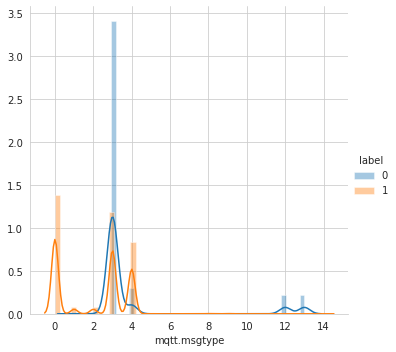

In [ ]:
# Let us plot do further univariate  analysis of this varable 

sns.FacetGrid(final_data_set, hue="label", height=5) \
   .map(sns.distplot, "mqtt.msgtype") \
   .add_legend();
plt.show();

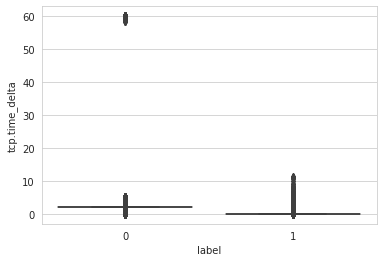

In [ ]:
sns.boxplot(x='label',y='tcp.time_delta',data=final_data_set)

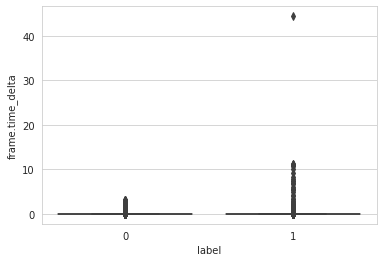

In [ ]:
sns.boxplot(x='label',y='frame.time_delta',data=final_data_set)

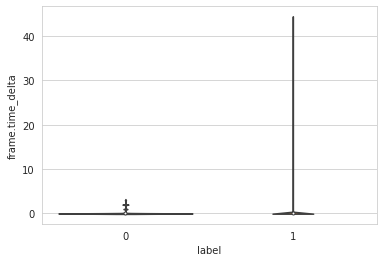

In [ ]:

sns.violinplot(x="label", y="frame.time_delta", data=final_data_set, size=8)
plt.show()

From the above box and violin plot we can understand that the variance for malicous attacks are more wide spread.

###Plotting the heatmap of the correlatons between features

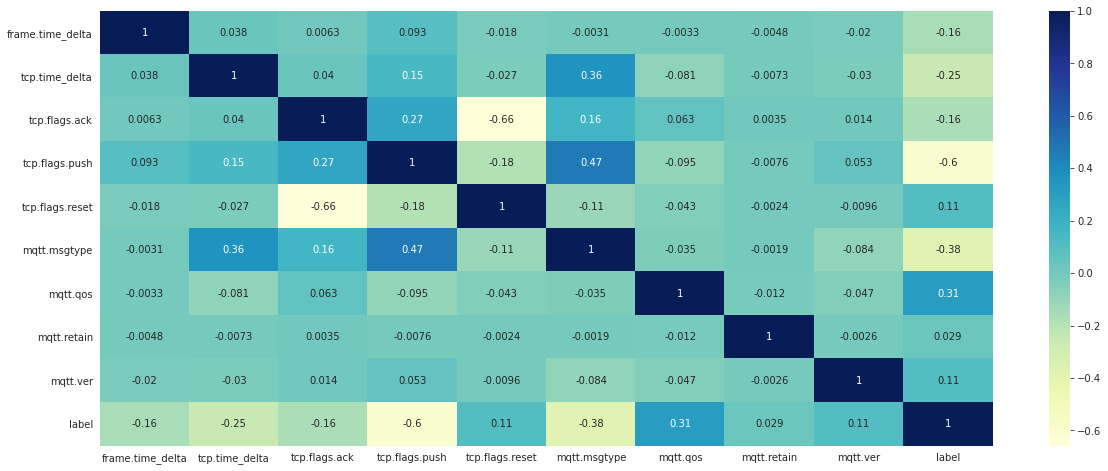

In [ ]:
plt.figure(figsize = (20,8))
sns.heatmap(final_data_set.corr(),cmap='YlGnBu',annot=True)


#Model Building :
**Machine Learning problem:**
This is calssification problem. Given the traffic,we have to classify it into malacious or normal class.

The following steps will be followed:

1. We will normalise the data into normal distrbution with mean-0 and 1 standard deviation.
2. Split the dataset into training and test data
3. Build model with logistic regression
4. Random Forest 
5. Calculate their accuracy as the distributions  of the class are balanced



In [ ]:
# Splitting the dataset into features and labels

X = final_data_set.iloc[:,:10]

In [ ]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
X.dtypes

frame.time_delta    float64
tcp.time_delta      float64
tcp.flags.ack         int64
tcp.flags.push        int64
tcp.flags.reset       int64
mqtt.hdrflags        object
mqtt.msgtype        float64
mqtt.qos            float64
mqtt.retain         float64
mqtt.ver            float64
dtype: object

In [ ]:
X['mqtt.hdrflags'][100:23500
                   ]

100               0
101               0
102               0
103               0
104               0
            ...    
23495             0
23496             0
23497    0x00000040
23498    0x00000040
23499             0
Name: mqtt.hdrflags, Length: 23400, dtype: object

The object type is a string in pandas and mathametical expressions can't be applied. Hence we are going to change object type dataset into float64

In [ ]:
import re
def change_string(value):
  value = re.sub("\D","",value)
  value=0
  return float(value)

change_string('0x00000040')

0.0

In [ ]:
X['mqtt.hdrflags']=X['mqtt.hdrflags'].apply(change_string)

In [ ]:
X.head()

,frame.time_delta,tcp.time_delta,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,mqtt.hdrflags,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.ver
0,0.000000,0.000000,0,0,0,0.0,0.0,0.0,0.0,0.0
1,0.000052,0.000052,1,0,0,0.0,0.0,0.0,0.0,0.0
2,0.000008,0.000000,0,0,0,0.0,0.0,0.0,0.0,0.0
3,0.000012,0.000012,1,0,0,0.0,0.0,0.0,0.0,0.0
4,0.000003,0.000000,0,0,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.shape

(188694, 10)

In [ ]:
Y = final_data_set.iloc[:,-1]

In [ ]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [ ]:
model_0 = Pipeline([
                    ("StandardScaler",StandardScaler()),
                    ("clf",LogisticRegression())

])

model_0.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('StandardScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
baseline_score_model_0 = model_0.score(x_test,y_test)
print(f"The accuracy of our model with logistics regression is {baseline_score_model_0*100:.2f}%")

The accuracy of our model with Naive Bayes is 95.34%



### Creating the model with Ramdomized search and hyper-parameter tunning 

In [ ]:
#logistic_model = LogisticRegression()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform

In [ ]:
logistic_model = LogisticRegression()
#distributions=dict(c=uniform(loc=-1,scale=4),penalty=['l2','l1'])
space = dict()
space['C']=loguniform(1e-5,100)
space['penalty']=['l1','l2','elasticnet']
space['solver'] = ['newton-cg', 'lbfgs', 'saga']
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

clf = RandomizedSearchCV(logistic_model,space,scoring = 'accuracy',cv=cv,verbose=1,random_state=123,n_jobs=-1)

search=clf.fit(x_train,y_train)

Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.7min finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
print(search.best_score_)

0.9518466835280175


In [ ]:
print(search.best_params_)

{'C': 1.0871332741421738, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
prediction=search.predict(x_test)

In [ ]:
from sklearn import metrics
print('accuracy:', metrics.accuracy_score(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

accuracy: 0.9533466409934817
[[30061  2528]
 [  113 23907]]


### Creating the model with Gridsearch search and hyper-parameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

space = dict()

space['solver'] = ['newton-cg', 'lbfgs', 'saga']
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

search = GridSearchCV(model,space,scoring='accuracy',n_jobs=-1,cv=cv)

result= search.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
print(result.best_score_)

0.9519930539210298


In [ ]:
print(result.best_params_)

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


### Creating model 2 with Randomforest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=1000,random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_predict=classifier.predict(x_test)

In [ ]:
from sklearn import metrics

metrics.accuracy_score(y_test,y_predict)

0.9966789733081313

In [ ]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def model_evaluation_metric(y_true,y_pred):

  # model accuracy 
  model_accuracy = accuracy_score(y_true,y_pred)
  # Calculate the precision,recall, f1 
  model_precision,model_recall,model_f1,_= precision_recall_fscore_support(y_true,y_pred,average="weighted") 

  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                  "recall" : model_recall,
                   "f1 score" : model_f1
                   }
  return model_results         

In [ ]:
model_2_results = model_evaluation_metric(y_true=y_test,y_pred=y_predict)

In [ ]:
model_2_results

{'accuracy': 0.9966789733081313,
 'f1 score': 0.996678405542526,
 'precision': 0.9966802862340172,
 'recall': 0.9966789733081313}

In [ ]:
# Our function needs a different name to sklearn's plot_confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.
  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.
  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

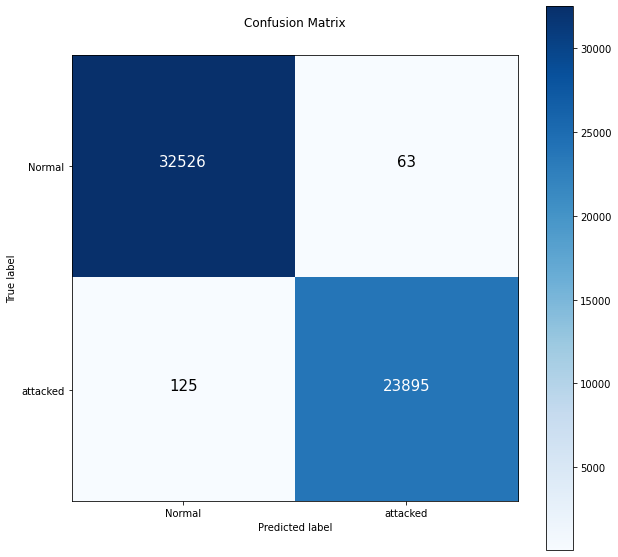

In [ ]:
confusion_matrix_model_2 = make_confusion_matrix(y_true=y_test,y_pred=y_predict,classes=['Normal','Attacked'])

# Deep learning approach towards the same problem:

we will use all the features to train the MLP and LSTM model

In [11]:
final_dataset = pd.concat([dataset_attack,dataset_environmentMonitor,dataset_patientMonitor])

In [12]:
final_dataset.head()

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,tcp.ack,tcp.connection.fin,tcp.connection.rst,tcp.connection.sack,tcp.connection.syn,tcp.flags.ack,tcp.flags.fin,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.urg,tcp.hdr_len,tcp.payload,tcp.pdu.size,tcp.window_size_value,tcp.checksum,mqtt.clientid,mqtt.clientid_len,mqtt.conack.flags,mqtt.conack.val,mqtt.conflag.passwd,mqtt.conflag.qos,mqtt.conflag.reserved,mqtt.conflag.retain,mqtt.conflag.willflag,mqtt.conflags,mqtt.dupflag,mqtt.hdrflags,mqtt.kalive,mqtt.len,mqtt.msg,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
0,0.000000,0.000000,74,10.16.120.44,10.16.120.72,56808,1883,0x00000002,0.000000,0,0,0.0,0.0,0.0,1.0,0,0,0,0,1,0,40,0,0.0,29200,0x00009a5d,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
1,0.000052,0.000052,74,10.16.120.72,10.16.120.44,1883,56808,0x00000012,0.000052,0,1,0.0,0.0,1.0,0.0,1,0,0,0,1,0,40,0,0.0,28960,0x00009941,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
2,0.000008,0.000060,74,10.16.120.44,10.16.120.72,56810,1883,0x00000002,0.000000,0,0,0.0,0.0,0.0,1.0,0,0,0,0,1,0,40,0,0.0,29200,0x0000bb2e,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
3,0.000012,0.000072,74,10.16.120.72,10.16.120.44,1883,56810,0x00000012,0.000012,0,1,0.0,0.0,1.0,0.0,1,0,0,0,1,0,40,0,0.0,28960,0x00000e6e,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1
4,0.000003,0.000075,74,10.16.120.44,10.16.120.72,56812,1883,0x00000002,0.000000,0,0,0.0,0.0,0.0,1.0,0,0,0,0,1,0,40,0,0.0,29200,0x0000f752,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,64,Attack,1


In [13]:
final_dataset.shape

(188694, 52)

In [14]:
final_dataset.tail()

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,tcp.ack,tcp.connection.fin,tcp.connection.rst,tcp.connection.sack,tcp.connection.syn,tcp.flags.ack,tcp.flags.fin,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.urg,tcp.hdr_len,tcp.payload,tcp.pdu.size,tcp.window_size_value,tcp.checksum,mqtt.clientid,mqtt.clientid_len,mqtt.conack.flags,mqtt.conack.val,mqtt.conflag.passwd,mqtt.conflag.qos,mqtt.conflag.reserved,mqtt.conflag.retain,mqtt.conflag.willflag,mqtt.conflags,mqtt.dupflag,mqtt.hdrflags,mqtt.kalive,mqtt.len,mqtt.msg,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
76805,0.000196,6611.037621,78,10.5.126.165,10.5.126.56,44993,1883,0x00000018,1.989358,10,225,0.0,0.0,0.0,0.0,1,0,1,0,0,0,32,30:08:00:03:45:43:47:31:37:35,10.0,512,0x00001118,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0x00000030,0.0,8.0,175,3.0,0.0,0.0,ECG,3.0,0.0,0.0,6,64,patientMonitoring,0
76806,0.000172,6611.037793,77,10.5.126.147,10.5.126.56,38323,1883,0x00000018,1.989338,9,225,0.0,0.0,0.0,0.0,1,0,1,0,0,0,32,30:07:00:03:45:4d:47:35:39,9.0,512,0x00001105,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0x00000030,0.0,7.0,59,3.0,0.0,0.0,EMG,3.0,0.0,0.0,6,64,patientMonitoring,0
76807,0.000126,6611.037919,77,10.5.126.147,10.5.126.56,41889,1883,0x00000018,1.989337,9,225,0.0,0.0,0.0,0.0,1,0,1,0,0,0,32,30:07:00:03:45:4d:47:35:33,9.0,512,0x00001105,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0x00000030,0.0,7.0,53,3.0,0.0,0.0,EMG,3.0,0.0,0.0,6,64,patientMonitoring,0
76808,0.000146,6611.038065,77,10.5.126.167,10.5.126.56,35965,1883,0x00000018,1.989211,9,225,0.0,0.0,0.0,0.0,1,0,1,0,0,0,32,30:07:00:03:45:4d:47:35:31,9.0,512,0x00001119,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0x00000030,0.0,7.0,51,3.0,0.0,0.0,EMG,3.0,0.0,0.0,6,64,patientMonitoring,0
76809,0.000147,6611.038212,77,10.5.126.167,10.5.126.56,33251,1883,0x00000018,1.989194,9,225,0.0,0.0,0.0,0.0,1,0,1,0,0,0,32,30:07:00:03:45:4d:47:35:38,9.0,512,0x00001119,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0x00000030,0.0,7.0,58,3.0,0.0,0.0,EMG,3.0,0.0,0.0,6,64,patientMonitoring,0


In [15]:
# Selecting 10 features:

final_data=final_dataset.filter(items=['frame.time_delta','tcp.time_delta','tcp.flags.ack','tcp.flags.push', 'tcp.flags.reset', 'mqtt.hdrflags', 'mqtt.msgtype', 'mqtt.qos', 'mqtt.retain','mqtt.ver','label'])

In [16]:
final_data.head()

,frame.time_delta,tcp.time_delta,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,mqtt.hdrflags,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.ver,label
0,0.000000,0.000000,0,0,0,0,0.0,0.0,0.0,0.0,1
1,0.000052,0.000052,1,0,0,0,0.0,0.0,0.0,0.0,1
2,0.000008,0.000000,0,0,0,0,0.0,0.0,0.0,0.0,1
3,0.000012,0.000012,1,0,0,0,0.0,0.0,0.0,0.0,1
4,0.000003,0.000000,0,0,0,0,0.0,0.0,0.0,0.0,1


In [17]:
final_data.dtypes

frame.time_delta    float64
tcp.time_delta      float64
tcp.flags.ack         int64
tcp.flags.push        int64
tcp.flags.reset       int64
mqtt.hdrflags        object
mqtt.msgtype        float64
mqtt.qos            float64
mqtt.retain         float64
mqtt.ver            float64
label                 int64
dtype: object

In [18]:
import re
def change_string(value):
  value = re.sub("\D","",value)
  
  return float(value)

change_string('0x00000040')

40.0

In [19]:
final_data['mqtt.hdrflags']=final_data['mqtt.hdrflags'].apply(change_string)

In [20]:
final_data['mqtt.hdrflags'][:10]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: mqtt.hdrflags, dtype: float64

In [21]:
final_data.shape

(188694, 11)

In [22]:
final_data.head()

,frame.time_delta,tcp.time_delta,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,mqtt.hdrflags,mqtt.msgtype,mqtt.qos,mqtt.retain,mqtt.ver,label
0,0.000000,0.000000,0,0,0,0.0,0.0,0.0,0.0,0.0,1
1,0.000052,0.000052,1,0,0,0.0,0.0,0.0,0.0,0.0,1
2,0.000008,0.000000,0,0,0,0.0,0.0,0.0,0.0,0.0,1
3,0.000012,0.000012,1,0,0,0.0,0.0,0.0,0.0,0.0,1
4,0.000003,0.000000,0,0,0,0.0,0.0,0.0,0.0,0.0,1


In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

import tensorflow as tf



In [24]:
### Building neural network:

x = final_data.iloc[:,: 10]

In [25]:
x.shape

(188694, 10)

In [26]:
y = final_data.iloc[:,-1]

In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [28]:
y.shape

(188694,)

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((132085, 10), (56609, 10), (132085,), (56609,))

In [31]:
### defining the network architecture 
initializer = tf.keras.initializers.HeNormal()

In [36]:
inputs = layers.Input(shape=(10,),)
x = layers.Dense(512,activation='relu',kernel_initializer=initializer)(inputs)
x = layers.Dense(128,activation='relu',kernel_initializer=initializer)(x)
x = layers.Dense(64,activation='relu')(x)
x = layers.Dense(16,activation='relu')(x)
outputs = layers.Dense(1,activation='sigmoid')(x)

model_3 = tf.keras.Model(inputs,outputs)

In [37]:
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])

In [38]:
model_3.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               5632      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 80,609
Trainable params: 80,609
Non-trainable params: 0
_______________________________________________________

In [39]:
model_3_history = model_3.fit(x=x_train,y=y_train,epochs= 100,validation_data=(x_test,y_test))

Epoch 1/100
4128/4128 [==============================] - 18s 4ms/step - loss: 0.1327 - accuracy: 0.9448 - val_loss: 0.1074 - val_accuracy: 0.9554
Epoch 2/100
4128/4128 [==============================] - 20s 5ms/step - loss: 0.1113 - accuracy: 0.9523 - val_loss: 0.1136 - val_accuracy: 0.9515
Epoch 3/100
4128/4128 [==============================] - 20s 5ms/step - loss: 0.1049 - accuracy: 0.9536 - val_loss: 0.1022 - val_accuracy: 0.9523
Epoch 4/100
4128/4128 [==============================] - 20s 5ms/step - loss: 0.1022 - accuracy: 0.9546 - val_loss: 0.0971 - val_accuracy: 0.9557
Epoch 5/100
4128/4128 [==============================] - 20s 5ms/step - loss: 0.0995 - accuracy: 0.9555 - val_loss: 0.0954 - val_accuracy: 0.9569
Epoch 6/100
4128/4128 [==============================] - 18s 4ms/step - loss: 0.0997 - accuracy: 0.9557 - val_loss: 0.0953 - val_accuracy: 0.9568
Epoch 7/100
4128/4128 [==============================] - 18s 4ms/step - loss: 0.0980 - accuracy: 0.9558 - val_loss: 0.0973 -

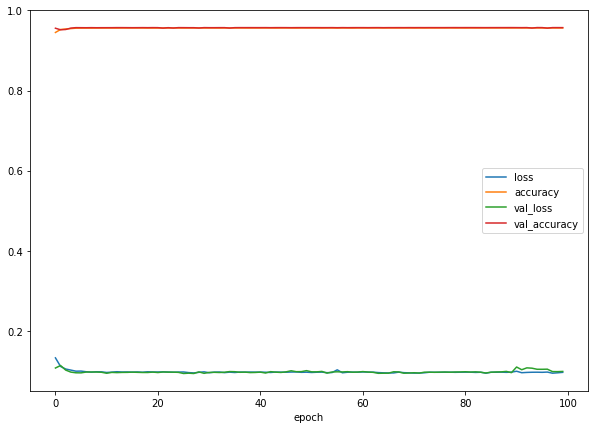

In [41]:
pd.DataFrame(model_3_history.history).plot(figsize=(10,7),xlabel='epoch')

### Creating the network with few other optimization

In [42]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

x_train =scaler.fit_transform(x_train)
x_test =scaler.transform(x_test)

In [50]:
# defining the network atchitecture 

inputs= layers.Input(shape=(10,),)
x = layers.Dense(64,activation='relu',kernel_initializer=initializer)(inputs)
x = layers.Dense(32,activation='tanh',kernel_initializer=initializer)(x)
x = layers.Dense(16,activation='relu',kernel_initializer=initializer)(x)
outputs =layers.Dense(1,activation='sigmoid')(x)

model_4 = tf.keras.Model(inputs,outputs)

# compiling the model
model_4.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

# creating learning rate callbacks 

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

model_4_history = model_4.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
4128/4128 [==============================] - 18s 4ms/step - loss: 0.1809 - accuracy: 0.9210 - val_loss: 0.1065 - val_accuracy: 0.9549
Epoch 2/100
4128/4128 [==============================] - 20s 5ms/step - loss: 0.1068 - accuracy: 0.9537 - val_loss: 0.1018 - val_accuracy: 0.9556
Epoch 3/100
4128/4128 [==============================] - 18s 4ms/step - loss: 0.1036 - accuracy: 0.9542 - val_loss: 0.1000 - val_accuracy: 0.9556
Epoch 4/100
4128/4128 [==============================] - 20s 5ms/step - loss: 0.1021 - accuracy: 0.9542 - val_loss: 0.0986 - val_accuracy: 0.9555
Epoch 5/100
4128/4128 [==============================] - 20s 5ms/step - loss: 0.1008 - accuracy: 0.9543 - val_loss: 0.0982 - val_accuracy: 0.9556
Epoch 6/100
4128/4128 [==============================] - 20s 5ms/step - loss: 0.0998 - accuracy: 0.9546 - val_loss: 0.0963 - val_accuracy: 0.9567
Epoch 7/100
4128/4128 [==============================] - 20s 5ms/step - loss: 0.0987 - accuracy: 0.9551 - val_loss: 0.0956 -

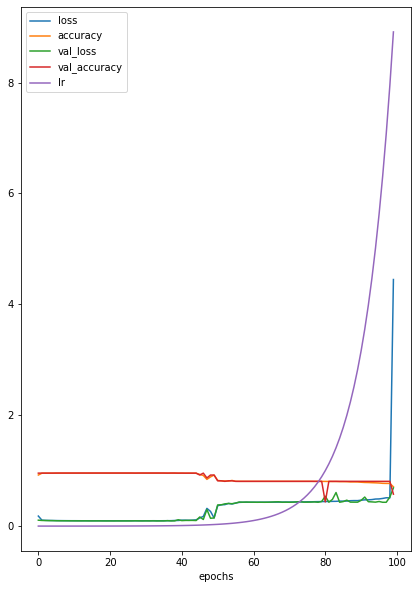

In [52]:
pd.DataFrame(model_4_history.history).plot(figsize=(7,10),xlabel='epochs')

In [ ]:
X = X.reshape(-1,65,1)

In [59]:
inputs = layers.Input(batch_input_shape=(None, 10, 1),)
x = layers.Conv1D(16,kernel_size=5,padding='same',activation='relu')(inputs)
x = layers.Conv1D(8,kernel_size=5,padding='same',activation='relu')(x)
x = layers.Dense(16,activation='relu')(x)
outputs = layers.Dense(1,activation='sigmoid')(x)

model_5 = tf.keras.Model(inputs,outputs)

# Creating model_5 

model_5.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

model_5_history = model_5.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))



Epoch 1/100
4128/4128 [==============================] - 53s 6ms/step - loss: 0.2005 - accuracy: 0.9124 - val_loss: 0.1610 - val_accuracy: 0.9300
Epoch 2/100
4128/4128 [==============================] - 26s 6ms/step - loss: 0.1622 - accuracy: 0.9297 - val_loss: 0.1582 - val_accuracy: 0.9320
Epoch 3/100
4128/4128 [==============================] - 26s 6ms/step - loss: 0.1600 - accuracy: 0.9304 - val_loss: 0.1561 - val_accuracy: 0.9322
Epoch 4/100
4128/4128 [==============================] - 26s 6ms/step - loss: 0.1585 - accuracy: 0.9308 - val_loss: 0.1552 - val_accuracy: 0.9322
Epoch 5/100
4128/4128 [==============================] - 26s 6ms/step - loss: 0.1574 - accuracy: 0.9310 - val_loss: 0.1585 - val_accuracy: 0.9293
Epoch 6/100
4128/4128 [==============================] - 26s 6ms/step - loss: 0.1565 - accuracy: 0.9313 - val_loss: 0.1533 - val_accuracy: 0.9325
Epoch 7/100
4128/4128 [==============================] - 26s 6ms/step - loss: 0.1557 - accuracy: 0.9316 - val_loss: 0.1526 -

In [62]:
# Creating the model with more parameters 

inputs = layers.Input(batch_input_shape=(None, 10, 1),)
x = layers.Conv1D(64,kernel_size=3,padding='same',activation='relu')(inputs)
x = layers.MaxPool1D()(x)
x = layers.Conv1D(32,kernel_size=5,padding='same',activation='relu')(x)
x = layers.Dense(16,activation='relu')(x)
outputs = layers.Dense(1,activation='sigmoid')(x)

model_5 = tf.keras.Model(inputs,outputs)

# Creating model_5 

model_5.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

model_5_history = model_5.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
4128/4128 [==============================] - 30s 7ms/step - loss: 0.1511 - accuracy: 0.9357 - val_loss: 0.1295 - val_accuracy: 0.9453
Epoch 2/100
4128/4128 [==============================] - 28s 7ms/step - loss: 0.1287 - accuracy: 0.9433 - val_loss: 0.1242 - val_accuracy: 0.9460
Epoch 3/100
4128/4128 [==============================] - 28s 7ms/step - loss: 0.1254 - accuracy: 0.9446 - val_loss: 0.1265 - val_accuracy: 0.9459
Epoch 4/100
4128/4128 [==============================] - 28s 7ms/step - loss: 0.1227 - accuracy: 0.9452 - val_loss: 0.1198 - val_accuracy: 0.9463
Epoch 5/100
4128/4128 [==============================] - 28s 7ms/step - loss: 0.1208 - accuracy: 0.9455 - val_loss: 0.1171 - val_accuracy: 0.9465
Epoch 6/100
4128/4128 [==============================] - 28s 7ms/step - loss: 0.1194 - accuracy: 0.9456 - val_loss: 0.1171 - val_accuracy: 0.9466
Epoch 7/100
4128/4128 [==============================] - 28s 7ms/step - loss: 0.1190 - accuracy: 0.9457 - val_loss: 0.1165 -

In [ ]:
inputs = layers.Input(batch_input_shape=(None, 10, 1),)
x = layers.Conv1D(16,kernel_size=3,padding='same',activation='relu')(inputs)
x = layers.MaxPool1D()(x)
x = layers.Conv1D(32,kernel_size=5,padding='same',activation='relu')(x)
x = layers.Dense(8,activation='relu')(x)
outputs = layers.Dense(1,activation='sigmoid')(x)

model_5 = tf.keras.Model(inputs,outputs)

# Creating model_5 

model_5.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=["accuracy"])

model_5_history = model_5.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))